In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
from datetime import datetime

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
import os
import sys

root_folder = os.path.dirname(os.path.abspath(os.getcwd()))
fetching_data_module_folder = root_folder + "\\fetch_data"

sys.path.insert(0, fetching_data_module_folder)

from fetching_satellite_based import remote_sensing_factor_df

In [3]:
begin_year = 2019
end_year = 2024
atmospheric_factors = ['CLOUD', 'CO', 'HCHO', 'NO2', 'O3', 'SO2', 'AAI']
plant_factor = 'NDVI'

In [4]:
atmospheric_consolidated_df = remote_sensing_factor_df(factor=atmospheric_factors[0], begin=begin_year, end=end_year)

for i in range(1, len(atmospheric_factors)):
    
    factor = atmospheric_factors[i]
    
    factor_df = remote_sensing_factor_df(factor=factor, begin=begin_year, end=end_year)
    
    atmospheric_consolidated_df[factor] = np.array(factor_df[factor])

atmospheric_consolidated_df

,lon,lat,date,ID,CLOUD,CO,HCHO,NO2,O3,SO2,AAI
6570,105.850899,21.021299,2019-01-01,5,1.000000,NaN,NaN,NaN,0.098825,NaN,-1.112399
0,105.741867,21.049749,2019-01-01,19,1.000000,NaN,NaN,NaN,0.100395,NaN,-1.279025
1460,105.948544,21.200344,2019-01-01,51,1.000000,NaN,NaN,NaN,0.101433,NaN,-1.010720
1825,106.288330,21.123247,2019-01-01,52,1.000000,NaN,NaN,NaN,0.100538,NaN,-0.925846
2190,106.111371,21.152745,2019-01-01,53,1.000000,NaN,NaN,NaN,0.100538,NaN,-0.859729
...,...,...,...,...,...,...,...,...,...,...,...
8051,106.314003,20.927000,2024-12-31,172,0.548964,NaN,NaN,NaN,0.114212,NaN,-0.650442
8417,106.430801,20.977400,2024-12-31,173,0.457147,0.04615,NaN,NaN,0.113339,NaN,-0.660913
9149,106.385597,21.116400,2024-12-31,175,0.655623,NaN,NaN,NaN,0.112949,NaN,-0.580081
6587,105.367302,21.338470,2024-12-31,195,1.000000,NaN,NaN,NaN,0.113975,NaN,-0.406657


In [5]:
ndvi_df = remote_sensing_factor_df(factor='NDVI', begin=2001, end=2021)

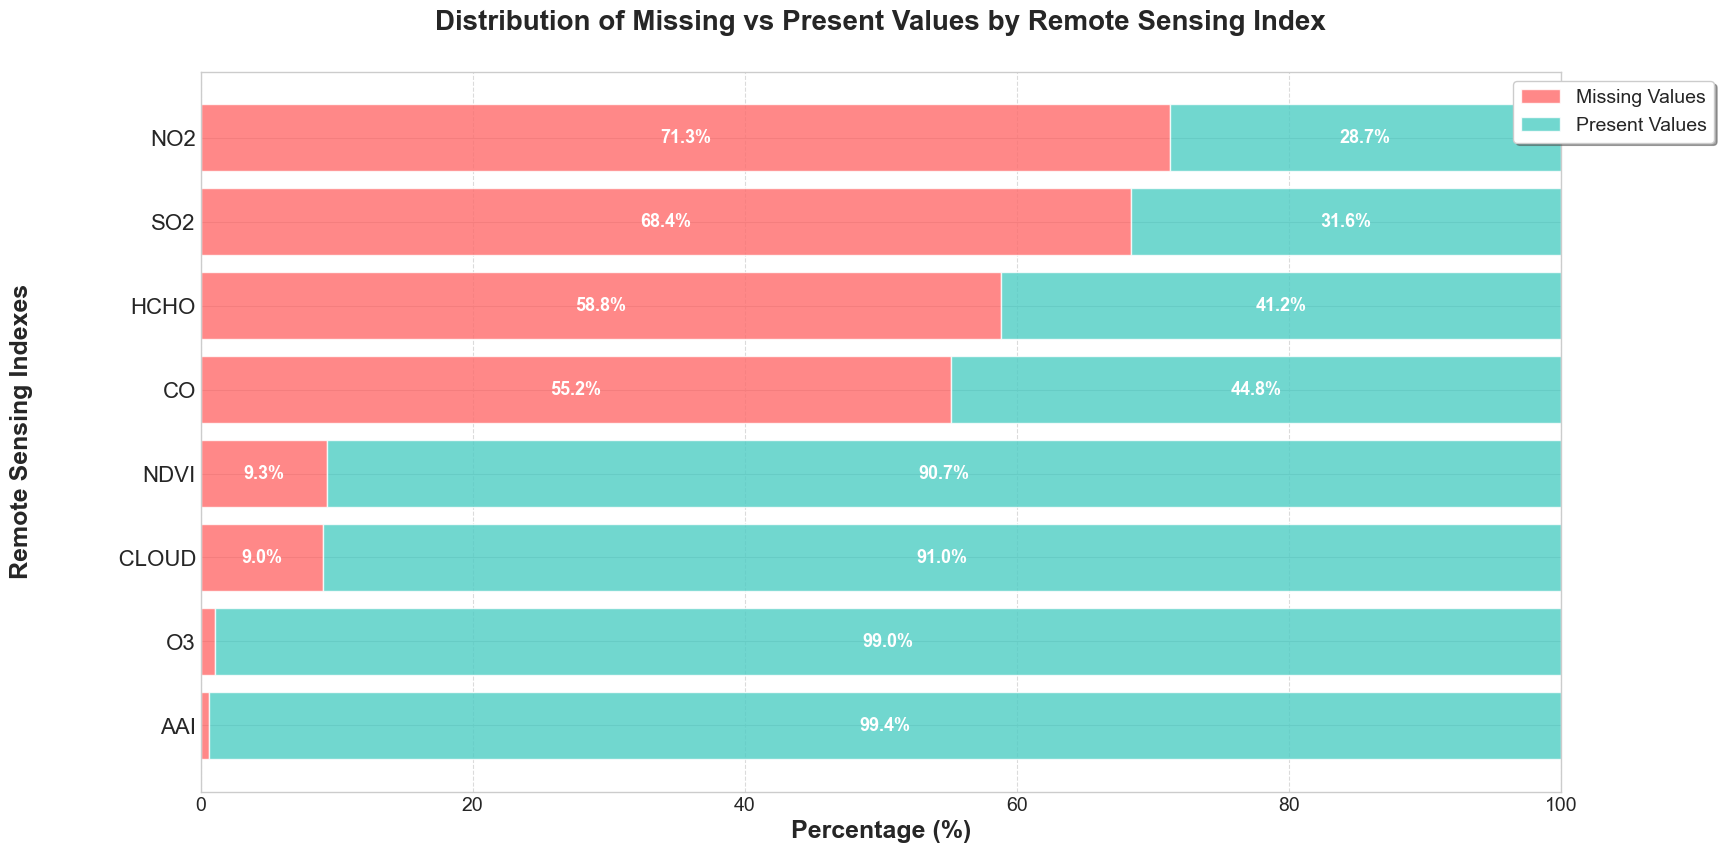

In [6]:
import seaborn as sns
import numpy as np
import pandas as pd

# Giả sử tmp_consolidated_df và tmp_ndvi_df đã được định nghĩa
tmp_consolidated_df = atmospheric_consolidated_df.drop(['lon', 'lat', 'date', 'ID'], axis=1)
tmp_ndvi_df = ndvi_df.drop(['lon', 'lat', 'date', 'ID'], axis=1)

tmp_consolidated_df.rename(columns={"CLOUD": "             CLOUD"}, inplace=True)
 
# Tính missing cho tmp_consolidated_df
total_rows_cons = len(tmp_consolidated_df)
missing_counts_cons = tmp_consolidated_df.isna().sum()
missing_percent_cons = (missing_counts_cons / total_rows_cons * 100).round(2)
non_missing_percent_cons = 100 - missing_percent_cons

# Tính missing cho tmp_ndvi_df
total_rows_ndvi = len(tmp_ndvi_df)
missing_counts_ndvi = tmp_ndvi_df.isna().sum()
missing_percent_ndvi = (missing_counts_ndvi / total_rows_ndvi * 100).round(2)
non_missing_percent_ndvi = 100 - missing_percent_ndvi

# Giữ nguyên tên cột gốc (không thêm tiền tố)
combined_missing = pd.concat([missing_percent_cons, missing_percent_ndvi])
combined_non_missing = pd.concat([non_missing_percent_cons, non_missing_percent_ndvi])

# Sắp xếp theo phần trăm missing tăng dần (cho trục y)
combined_missing_sorted = combined_missing.sort_values()
sorted_index = combined_missing_sorted.index

# Tính số lượng chỉ số và chiều cao biểu đồ (1.2 là chiều cao mỗi thanh)
num_indices = len(sorted_index)
fig_height = num_indices * 1.2

plt.figure(figsize=(20, fig_height))  # Chiều rộng cố định là 20
sns.set_style("whitegrid")

y_pos = np.arange(num_indices)

# Vẽ biểu đồ stacked bar
plt.barh(y_pos, combined_missing_sorted[sorted_index], color='#FF6B6B', 
         alpha=0.8, label='Missing Values', height=0.8)
plt.barh(y_pos, combined_non_missing[sorted_index], 
         left=combined_missing_sorted[sorted_index], color='#4ECDC4', 
         alpha=0.8, label='Present Values', height=0.8)

# Đặt giới hạn trục x để đảm bảo độ dài thanh ngang đồng bộ
plt.xlim(0, 100)

# Thiết lập nhãn trục với font lớn
plt.yticks(y_pos, sorted_index, fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel('Percentage (%)', fontsize=18, fontweight='bold')
plt.ylabel('Remote Sensing Indexes', fontsize=18, fontweight='bold')

# Tiêu đề biểu đồ
plt.title('Distribution of Missing vs Present Values by Remote Sensing Index', 
          fontsize=20, fontweight='bold', pad=30)

# Đặt legend bên ngoài không che biểu đồ
plt.legend(loc='upper right', bbox_to_anchor=(1.12, 1.0), 
           frameon=True, fancybox=True, shadow=True, fontsize=14)

# Vẽ grid dọc theo trục x
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Thêm nhãn phần trăm vào giữa mỗi thanh
for i, pos in enumerate(y_pos):
    m_val = combined_missing_sorted[sorted_index[i]]
    p_val = combined_non_missing[sorted_index[i]]
    if m_val > 5:
        plt.text(m_val/2, pos, f'{m_val:.1f}%', ha='center', va='center', 
                 color='white', fontweight='bold', fontsize=13)
    if p_val > 5:
        plt.text(m_val + p_val/2, pos, f'{p_val:.1f}%', ha='center', va='center', 
                 color='white', fontweight='bold', fontsize=13)

# Điều chỉnh layout để đồng bộ không gian
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.88, top=0.85, bottom=0.1)  # Đồng bộ các lề

plt.show()

In [7]:
date_format = '%Y-%m-%d'

# Extract & visualize data at station with id = 5 within 01/01/2019 to 31/12/2019
tmp_df = atmospheric_consolidated_df.loc[(atmospheric_consolidated_df['ID'] == 5) & (atmospheric_consolidated_df['date'] < datetime.strptime('2020-01-01', date_format))]

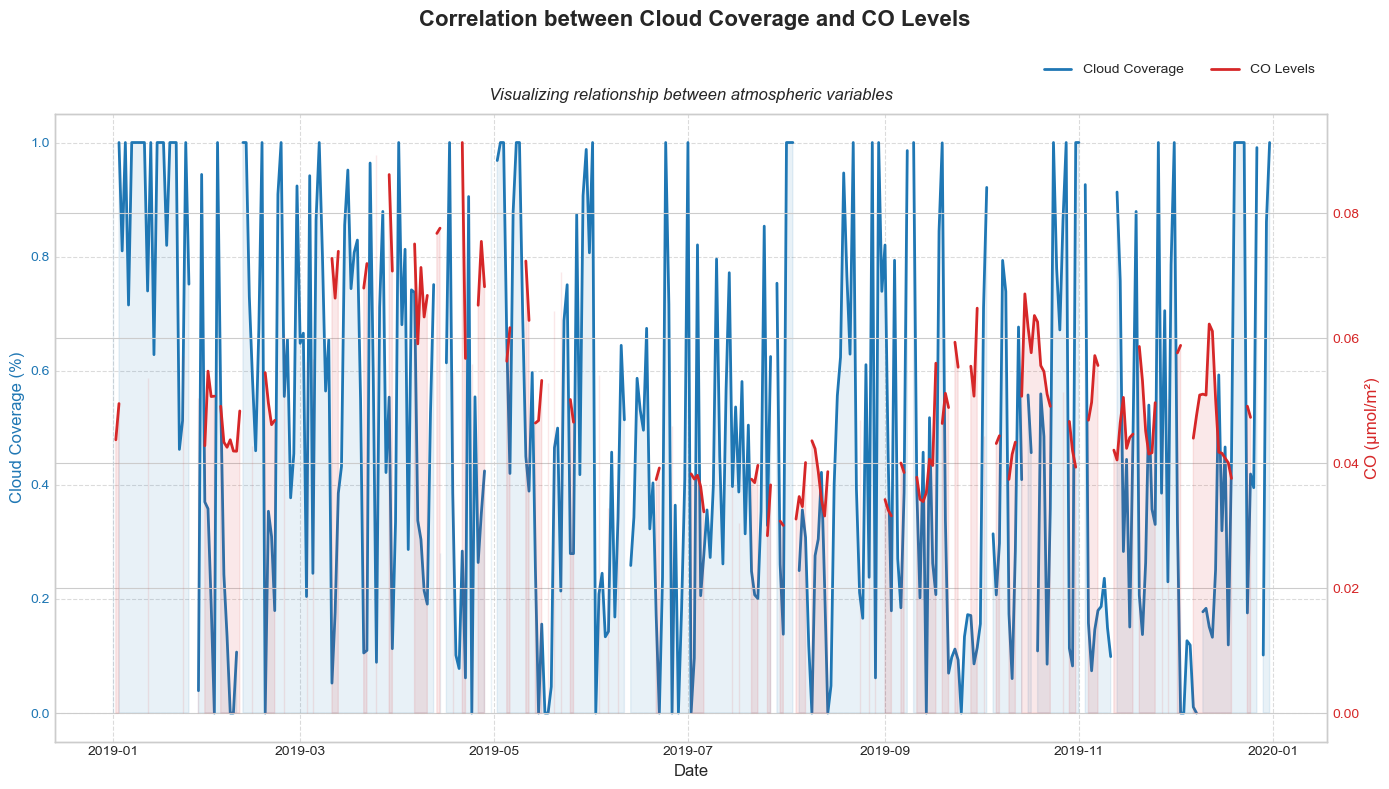

In [8]:
# Tạo figure với kích thước lớn hơn 
fig, ax1 = plt.subplots(figsize=(14, 8))

# Tiêu đề chính kết hợp cả tiêu đề phụ
fig.suptitle('Correlation between Cloud Coverage and CO Levels\n', 
             fontsize=16, fontweight='bold')
plt.title('Visualizing relationship between atmospheric variables', 
         fontsize=12, style='italic', pad=10)

# Trục Y bên trái cho CLOUD
cloud_line = ax1.plot(tmp_df['date'], tmp_df['CLOUD'], color='#1f77b4', 
                     linewidth=2, label="Cloud Coverage")
ax1.fill_between(tmp_df['date'], tmp_df['CLOUD'], alpha=0.1, color='#1f77b4')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cloud Coverage (%)', fontsize=12, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4', labelsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)

# Tạo trục Y thứ hai bên phải cho CO
ax2 = ax1.twinx()
co_line = ax2.plot(tmp_df['date'], tmp_df['CO'], color='#d62728', 
                  linewidth=2, label="CO Levels")
ax2.fill_between(tmp_df['date'], tmp_df['CO'], alpha=0.1, color='#d62728')
ax2.set_ylabel('CO (μmol/m²)', fontsize=12, color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728', labelsize=10)

# Định dạng trục x 
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Kết hợp legends từ cả hai axes và đặt cao hơn biểu đồ
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Đặt legend cao hơn biểu đồ ở góc phải
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper right', 
           bbox_to_anchor=(1.0, 1.1),  # Di chuyển lên trên
           fancybox=True, shadow=True, fontsize=10, ncol=2, framealpha=0.9)

# Điều chỉnh không gian để chừa chỗ cho legend
plt.subplots_adjust(top=0.85)

plt.tight_layout()
# Cập nhật lại sau khi tight_layout để giữ các điều chỉnh về không gian
plt.subplots_adjust(top=0.85)
plt.show()

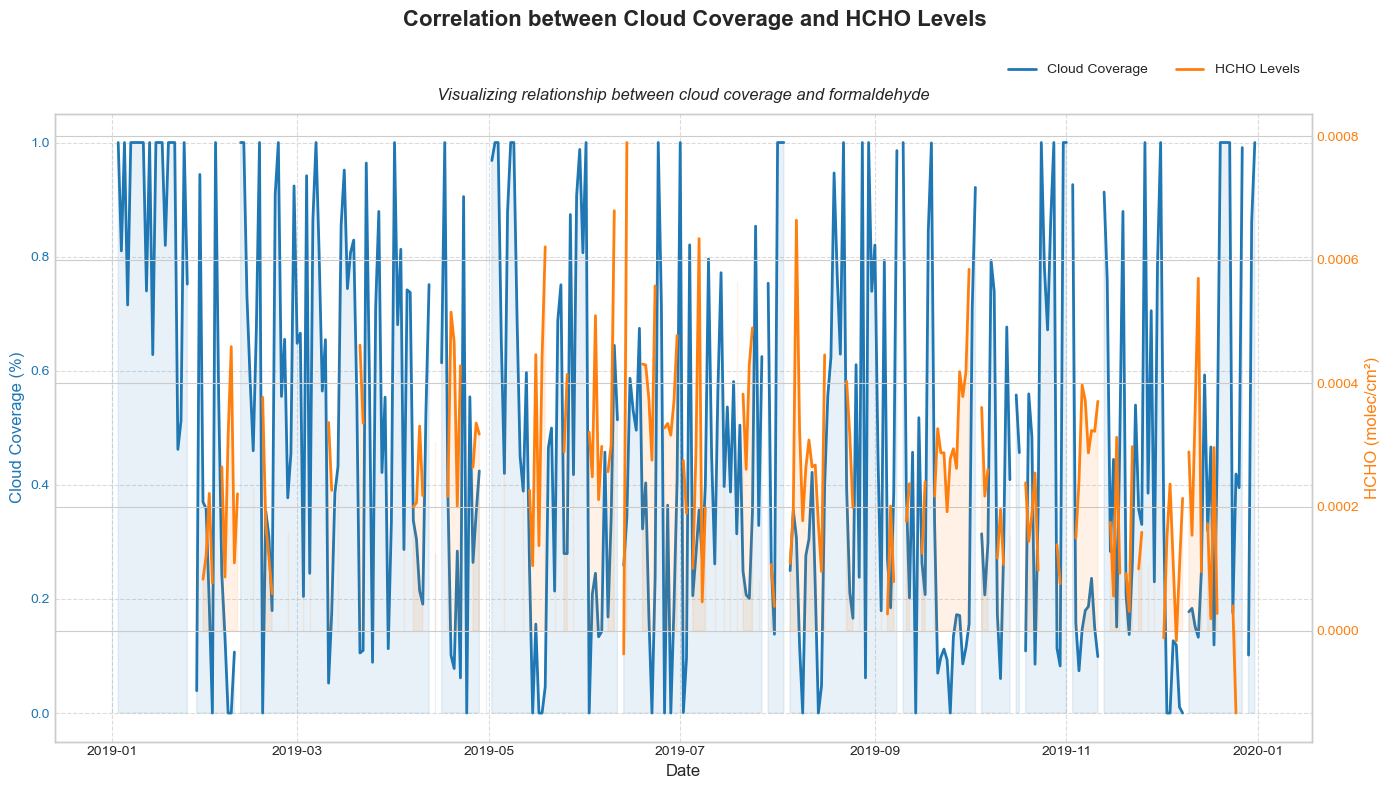

In [9]:
# Tạo figure với kích thước lớn hơn
fig, ax1 = plt.subplots(figsize=(14, 8))

# Tiêu đề chính kết hợp cả tiêu đề phụ
fig.suptitle('Correlation between Cloud Coverage and HCHO Levels\n', 
             fontsize=16, fontweight='bold')
plt.title('Visualizing relationship between cloud coverage and formaldehyde', 
         fontsize=12, style='italic', pad=10)

# Trục Y bên trái cho CLOUD
cloud_line = ax1.plot(tmp_df['date'], tmp_df['CLOUD'], color='#1f77b4', 
                     linewidth=2, label="Cloud Coverage")
ax1.fill_between(tmp_df['date'], tmp_df['CLOUD'], alpha=0.1, color='#1f77b4')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cloud Coverage (%)', fontsize=12, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4', labelsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)

# Tạo trục Y thứ hai bên phải cho HCHO
ax2 = ax1.twinx()
hcho_line = ax2.plot(tmp_df['date'], tmp_df['HCHO'], color='#ff7f0e', 
                  linewidth=2, label="HCHO Levels")
ax2.fill_between(tmp_df['date'], tmp_df['HCHO'], alpha=0.1, color='#ff7f0e')
ax2.set_ylabel('HCHO (molec/cm²)', fontsize=12, color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e', labelsize=10)

# Định dạng trục x 
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Kết hợp legends từ cả hai axes và đặt cao hơn biểu đồ
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Đặt legend cao hơn biểu đồ ở góc phải
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper right', 
           bbox_to_anchor=(1.0, 1.1),
           fancybox=True, shadow=True, fontsize=10, ncol=2, framealpha=0.9)

# Điều chỉnh không gian để chừa chỗ cho legend
plt.subplots_adjust(top=0.85)

plt.tight_layout()
# Cập nhật lại sau khi tight_layout để giữ các điều chỉnh về không gian
plt.subplots_adjust(top=0.85)
plt.show()

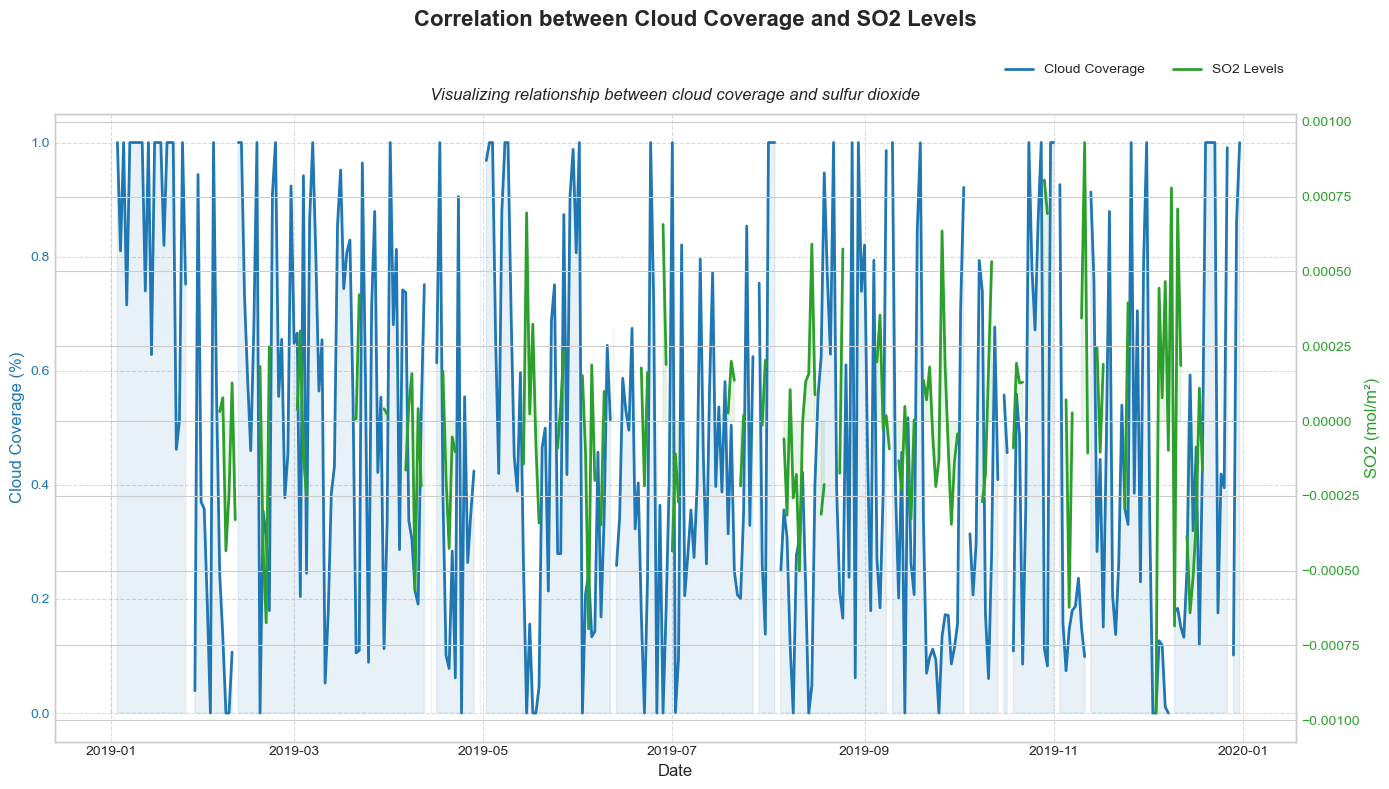

In [10]:
# Tạo figure với kích thước lớn hơn
fig, ax1 = plt.subplots(figsize=(14, 8))

# Tiêu đề chính kết hợp cả tiêu đề phụ
fig.suptitle('Correlation between Cloud Coverage and SO2 Levels\n', 
             fontsize=16, fontweight='bold')
plt.title('Visualizing relationship between cloud coverage and sulfur dioxide', 
         fontsize=12, style='italic', pad=10)

# Trục Y bên trái cho CLOUD
cloud_line = ax1.plot(tmp_df['date'], tmp_df['CLOUD'], color='#1f77b4', 
                     linewidth=2, label="Cloud Coverage")
ax1.fill_between(tmp_df['date'], tmp_df['CLOUD'], alpha=0.1, color='#1f77b4')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cloud Coverage (%)', fontsize=12, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4', labelsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)

# Tạo trục Y thứ hai bên phải cho SO2
ax2 = ax1.twinx()
so2_line = ax2.plot(tmp_df['date'], tmp_df['SO2'], color='#2ca02c', 
                  linewidth=2, label="SO2 Levels")
ax2.fill_between(tmp_df['date'], tmp_df['SO2'], alpha=0.1, color='#2ca02c')
ax2.set_ylabel('SO2 (mol/m²)', fontsize=12, color='#2ca02c')
ax2.tick_params(axis='y', labelcolor='#2ca02c', labelsize=10)

# Định dạng trục x 
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Kết hợp legends từ cả hai axes và đặt cao hơn biểu đồ
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Đặt legend cao hơn biểu đồ ở góc phải
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper right', 
           bbox_to_anchor=(1.0, 1.1),
           fancybox=True, shadow=True, fontsize=10, ncol=2, framealpha=0.9)

# Điều chỉnh không gian để chừa chỗ cho legend
plt.subplots_adjust(top=0.85)

plt.tight_layout()
# Cập nhật lại sau khi tight_layout để giữ các điều chỉnh về không gian
plt.subplots_adjust(top=0.85)
plt.show()

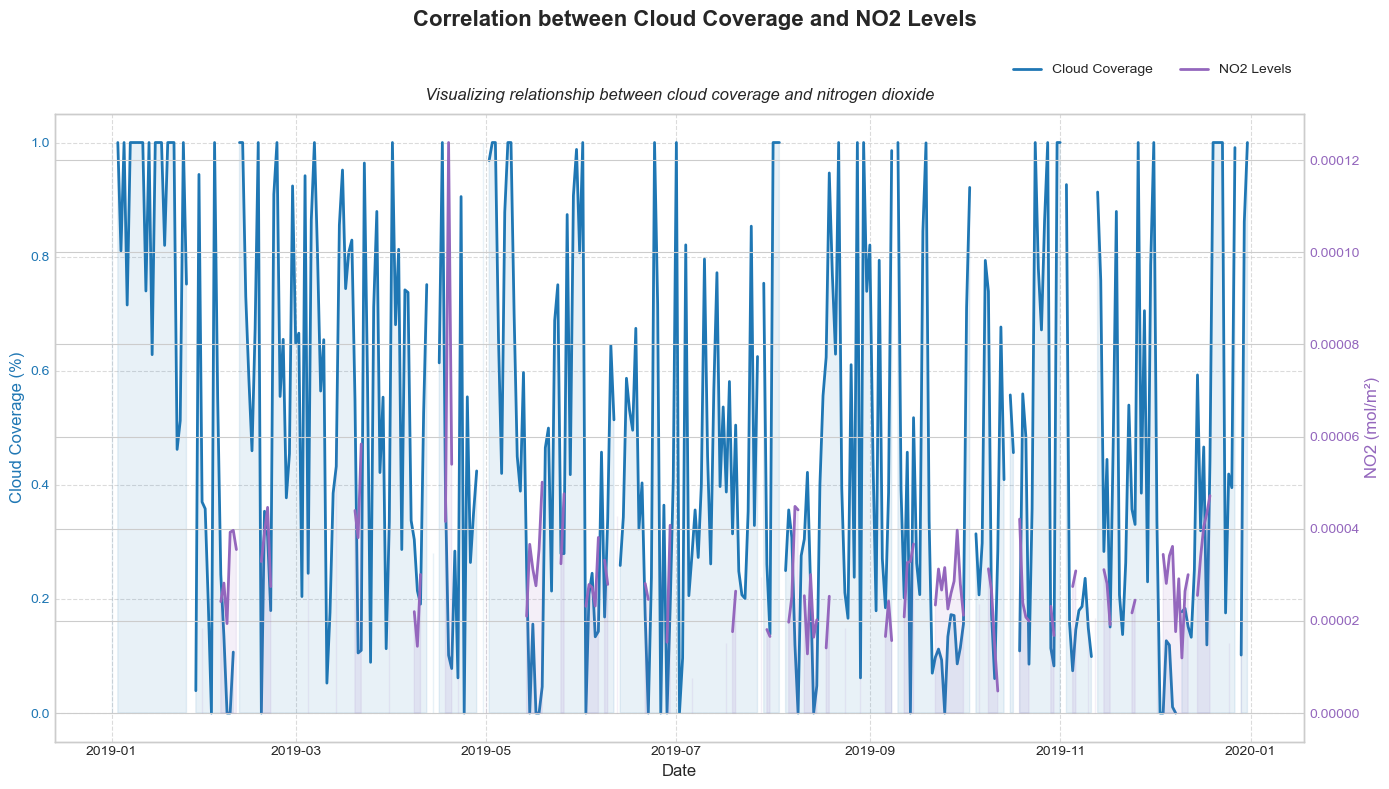

In [11]:
# Tạo figure với kích thước lớn hơn
fig, ax1 = plt.subplots(figsize=(14, 8))

# Tiêu đề chính kết hợp cả tiêu đề phụ
fig.suptitle('Correlation between Cloud Coverage and NO2 Levels\n', 
             fontsize=16, fontweight='bold')
plt.title('Visualizing relationship between cloud coverage and nitrogen dioxide', 
         fontsize=12, style='italic', pad=10)

# Trục Y bên trái cho CLOUD
cloud_line = ax1.plot(tmp_df['date'], tmp_df['CLOUD'], color='#1f77b4', 
                     linewidth=2, label="Cloud Coverage")
ax1.fill_between(tmp_df['date'], tmp_df['CLOUD'], alpha=0.1, color='#1f77b4')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cloud Coverage (%)', fontsize=12, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4', labelsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)

# Tạo trục Y thứ hai bên phải cho NO2
ax2 = ax1.twinx()
no2_line = ax2.plot(tmp_df['date'], tmp_df['NO2'], color='#9467bd', 
                  linewidth=2, label="NO2 Levels")
ax2.fill_between(tmp_df['date'], tmp_df['NO2'], alpha=0.1, color='#9467bd')
ax2.set_ylabel('NO2 (mol/m²)', fontsize=12, color='#9467bd')
ax2.tick_params(axis='y', labelcolor='#9467bd', labelsize=10)

# Định dạng trục x 
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Kết hợp legends từ cả hai axes và đặt cao hơn biểu đồ
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Đặt legend cao hơn biểu đồ ở góc phải
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper right', 
           bbox_to_anchor=(1.0, 1.1),
           fancybox=True, shadow=True, fontsize=10, ncol=2, framealpha=0.9)

# Điều chỉnh không gian để chừa chỗ cho legend
plt.subplots_adjust(top=0.85)

plt.tight_layout()
# Cập nhật lại sau khi tight_layout để giữ các điều chỉnh về không gian
plt.subplots_adjust(top=0.85)
plt.show()

C:\Users\CA_UOP_MUOI\AppData\Local\Temp\ipykernel_8348\486697025.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cloud_cmap = plt.cm.get_cmap('Blues')


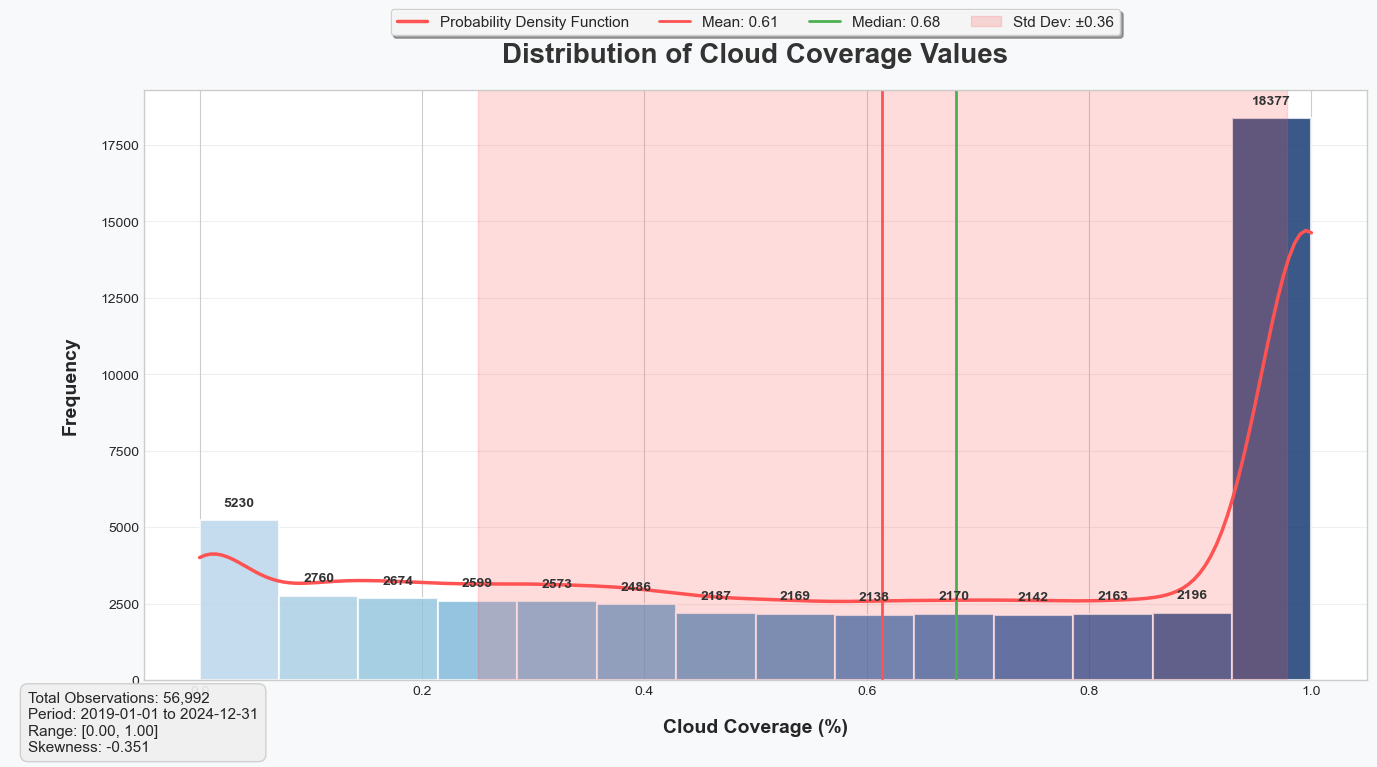

In [12]:
# Tạo figure với kích thước phù hợp và style
plt.figure(figsize=(14, 8), facecolor='#f8f9fa')
plt.style.use('seaborn-v0_8-whitegrid')

# Tạo gradient color map cho histogram
cloud_cmap = plt.cm.get_cmap('Blues')
bins = np.linspace(atmospheric_consolidated_df['CLOUD'].min(), atmospheric_consolidated_df['CLOUD'].max(), 15)
n, bins, patches = plt.hist(atmospheric_consolidated_df['CLOUD'], bins=bins, 
                           alpha=0.8, edgecolor='white', linewidth=1.5)

# Tạo gradient màu sắc cho các bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cloud_cmap(0.7*c+0.3))

# Thêm KDE (Kernel Density Estimation) để thấy rõ phân phối
from scipy import stats
kde_xs = np.linspace(atmospheric_consolidated_df['CLOUD'].min(), atmospheric_consolidated_df['CLOUD'].max(), 200)
kde = stats.gaussian_kde(atmospheric_consolidated_df['CLOUD'].dropna())
kde_values = kde(kde_xs)
# Scale KDE để hiển thị cùng tỉ lệ với histogram
scale_factor = n.max() / kde_values.max() * 0.8
plt.plot(kde_xs, kde_values * scale_factor, color='#FF5252', linewidth=2.5, 
         label='Probability Density Function')

# Tiêu đề và labels với styling hiện đại
plt.title('Distribution of Cloud Coverage Values', fontsize=20, fontweight='bold', 
          pad=20, color='#333333')
plt.xlabel('Cloud Coverage (%)', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Frequency', fontsize=14, fontweight='bold', labelpad=15)

# Grid lines với style đẹp hơn
plt.grid(axis='y', linestyle='-', alpha=0.3)

# Thêm giá trị bên trên mỗi bin với style đẹp hơn
max_height = n.max()
for i, (patch, height) in enumerate(zip(patches, n)):
    if height > 0:  # Chỉ hiển thị nhãn khi có giá trị
        plt.text(patch.get_x() + patch.get_width()/2, 
                height + max_height * 0.02, 
                str(int(height)), 
                ha='center', va='bottom', fontsize=10, 
                fontweight='bold', color='#333333')

# Thêm thông tin thống kê với style đẹp hơn
mean = atmospheric_consolidated_df['CLOUD'].mean()
median = atmospheric_consolidated_df['CLOUD'].median()
std_dev = atmospheric_consolidated_df['CLOUD'].std()

plt.axvline(mean, color='#FF5252', linestyle='-', linewidth=2, 
           label=f'Mean: {mean:.2f}')
plt.axvline(median, color='#4CAF50', linestyle='-', linewidth=2, 
           label=f'Median: {median:.2f}')

# Thêm vùng tô màu cho standard deviation
plt.axvspan(mean - std_dev, mean + std_dev, alpha=0.2, color='#FF5252',
            label=f'Std Dev: ±{std_dev:.2f}')

# Đặt legend bên ngoài biểu đồ phía trên
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4,
           frameon=True, fancybox=True, shadow=True, fontsize=11, framealpha=0.9)

# Box thông tin thống kê
stats_text = (f"Total Observations: {len(atmospheric_consolidated_df):,}\n"
             f"Period: {atmospheric_consolidated_df['date'].min().strftime('%Y-%m-%d')} to {atmospheric_consolidated_df['date'].max().strftime('%Y-%m-%d')}\n"
             f"Range: [{atmospheric_consolidated_df['CLOUD'].min():.2f}, {atmospheric_consolidated_df['CLOUD'].max():.2f}]\n"
             f"Skewness: {atmospheric_consolidated_df['CLOUD'].skew():.3f}")

plt.annotate(stats_text, xy=(0.02, 0.02), xycoords='figure fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#f0f0f0", 
                      edgecolor="#cccccc", alpha=0.9),
             fontsize=11)

# Thêm viền cho toàn bộ biểu đồ
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
for spine in plt.gca().spines.values():
    spine.set_color('#cccccc')
    
# Điều chỉnh lề trên để chừa không gian cho legend
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Áp dụng lại sau tight_layout
plt.show()